## 04-The assessment of sale closure duration
#### 04-1 Exporting libraries and file
#### 04-2  The evaluation of the time required to close a real estate sale.  
#### 04-3 Analyzing long closure sales outliers
#### 04-4 Analyzing the properties that have been sold but do not specify the sold amount  

### 04-1 Exporting libraries and file

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the created charts will be displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#importing file
path=r'C:\Users\user\11-2023 Real Estate Sales Connecticut'

In [4]:
df_re=pd.read_csv(os.path.join(path,'Data','Prepared Data','realestate_clean.csv'), index_col=0)

### 04-2  The evaluation of the time required to close a real estate sale.   (Creating categorical plot with a new variable 'Demand')

In [5]:
###importing the sold real estate df
df_sold=pd.read_csv(os.path.join(path,'Data','Prepared Data','realestate_sold.csv'), index_col=0)

In [6]:
df_sold.head(2)

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale,Sale_Amount_Zscore
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Non Residental,2021,9,-0.040765
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,2020,10,0.033112


#### 04-2-1 Deviding pursheses by speed of sale to Demand Ranges(speed of sale deal)

In [6]:
### Creating categorical plot with a new variable
df_sold.loc[((df_sold['Year of Sale'] - df_sold['List Year'])==0 ), 'Demand Range'] = 'Immediately'


C:\Users\user\AppData\Local\Temp\ipykernel_13808\1268245768.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Immediately' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sold.loc[((df_sold['Year of Sale'] - df_sold['List Year'])==0 ), 'Demand Range'] = 'Immediately'


In [7]:
df_sold.loc[((df_sold['Year of Sale'] - df_sold['List Year'])==1), 'Demand Range'] = 'One_Year' 

In [8]:
df_sold.loc[((df_sold['Year of Sale'] - df_sold['List Year'])==2 ), 'Demand Range'] = 'Two_Years'

In [9]:
df_sold.loc[((df_sold['Year of Sale'] - df_sold['List Year'])>2 ), 'Demand Range'] = 'Some_years'

In [11]:
df_sold['Demand Range'].value_counts(dropna = False)

Demand Range
One_Year       747819
Immediately    247480
NaN                56
Two_Years           8
Some_years          4
Name: count, dtype: int64

In [12]:
df_sold.columns

Index(['Serial Number', 'List Year', 'Town', 'Address', 'Assessed Value',
       'Sale Amount', 'Sales Ratio', 'Property Type', 'Residential Type',
       'Year of Sale', 'Month of Sale', 'Sale_Amount_Zscore', 'Demand Range'],
      dtype='object')

### 04-2-2  The assessment of the correlation between the duration of sale closure and the Residential and Property types in Real Estate.  

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

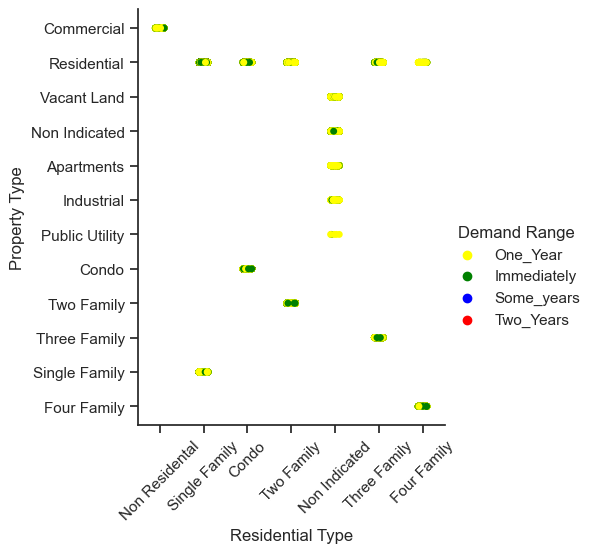

In [13]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Residential Type", y="Property Type", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

In [14]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'PropertyType_ResidentalType_DemandRange.png'))

### Conclusions: There is no evident correlation of sale closure time to Residential type or Property time.

### 04-2-3 The assessment of the correlation between the duration of sale closure and the Sales Amount by Property types in Real Estate 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

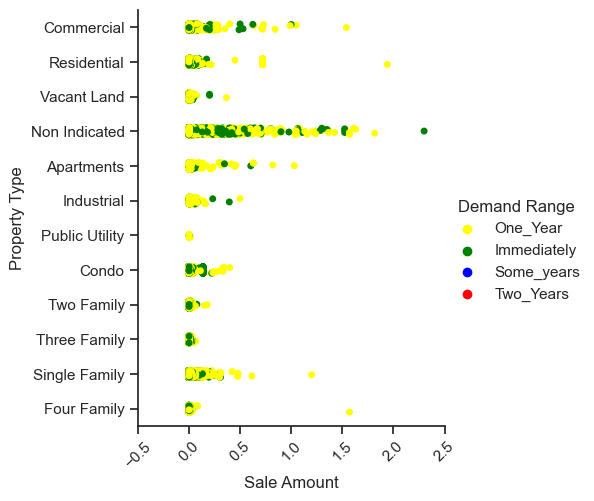

In [15]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Sale Amount", y="Property Type", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

In [16]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'PropertyType_SaleAmount_DemandRange.png'))

### Conclusions: There is no evident correlation of sale closure time to Residential type or Property time.

### 04-2-4 The assessment of the correlation between the duration of sale closure and the Sales Amount by Residential Type in Real Estate 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

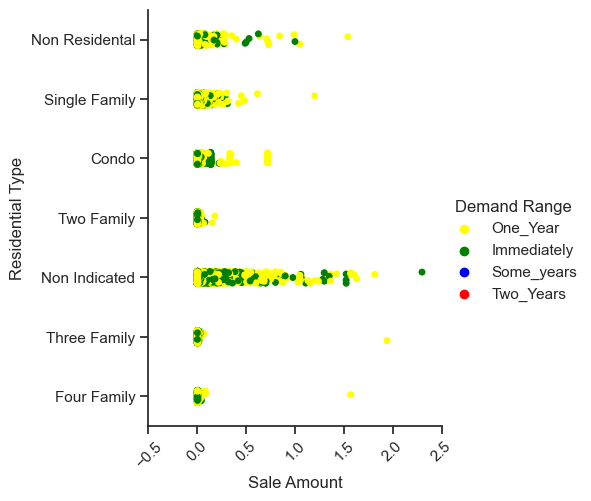

In [17]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Sale Amount", y="Residential Type", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

In [18]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'SaleAmount_ResidentalType_DemandRange.png'))

### Conclusions: There is no evident correlation of sale closure time to Residential type or Property time

### 04-2-5 The assessment of the correlation between the duration of sale closure and the Property Location by Property Type 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

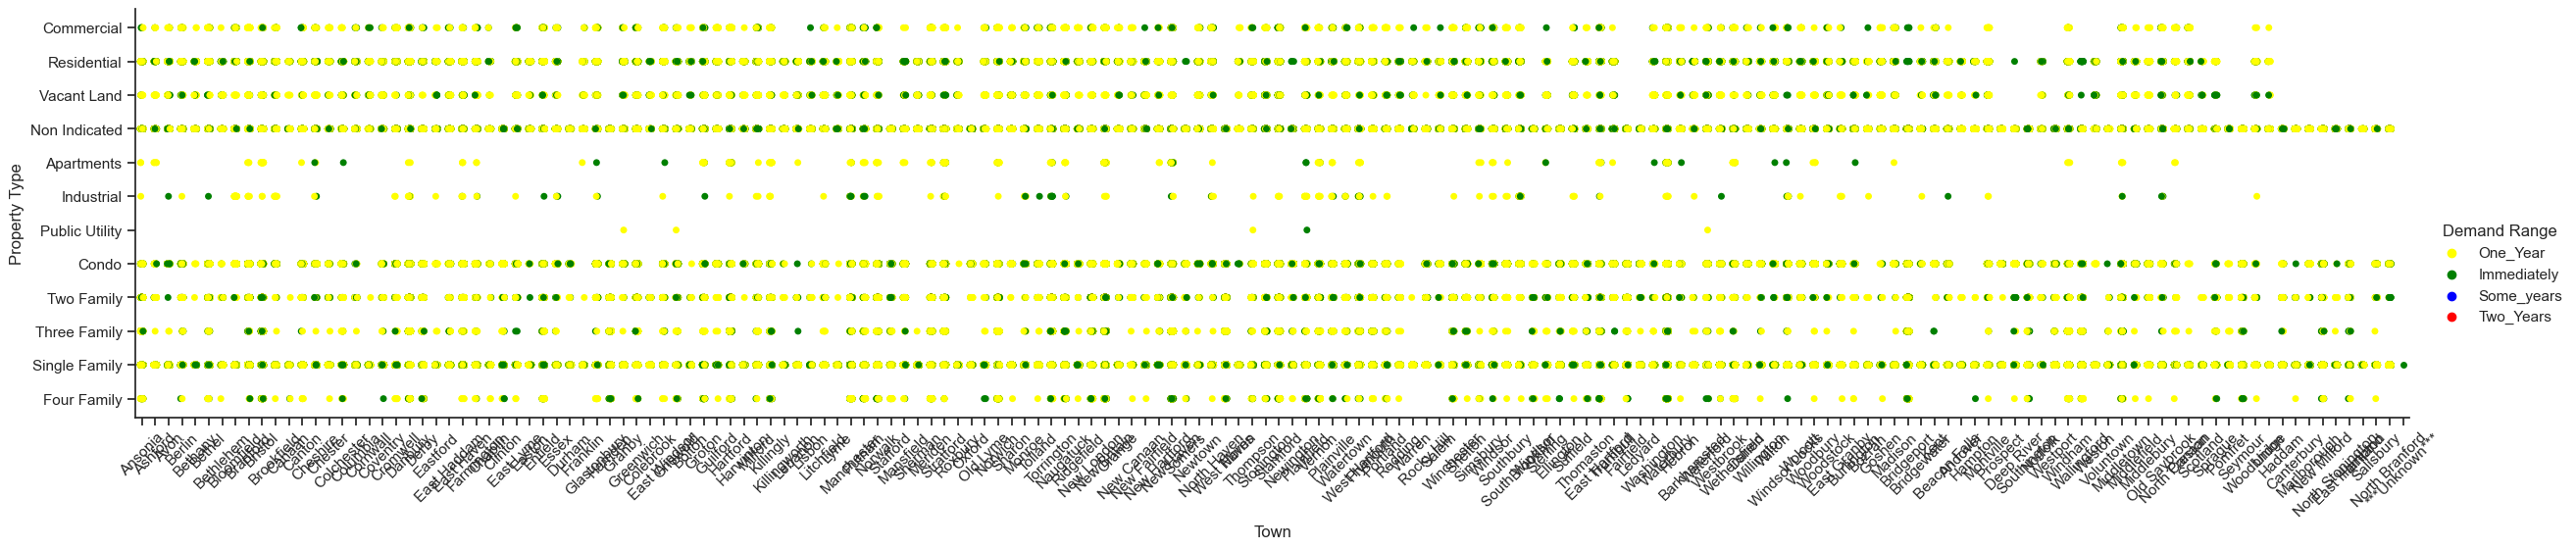

In [19]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Town", y="Property Type", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'], aspect=5)
g.set_xticklabels(rotation=45)

In [20]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'PropertyType_Town_DemandRange.png'))

### Conclusion: No relevant correlation in this plot

### 04-2-6 The assessment of the correlation between the duration of sale closure and the Assessed Value by Property Type 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

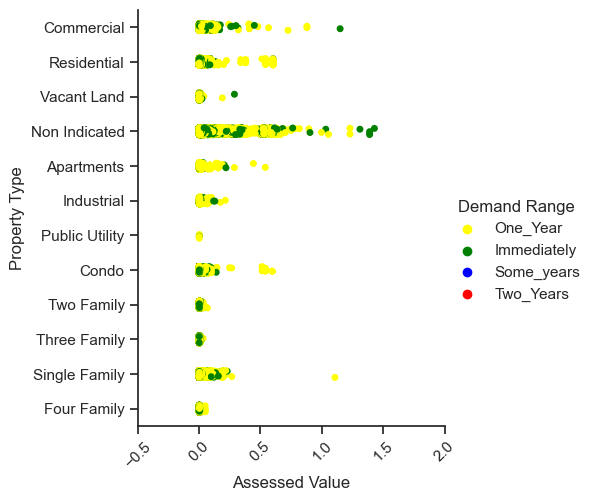

In [21]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Assessed Value", y="Property Type", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

### Conclusion: No relevant correlation in this plot

### 04-2-7 The assessment of the correlation between the duration of sale closure and the  Month of closure by Property Type /Residence Type/ Year os Sale

### -Property Type

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

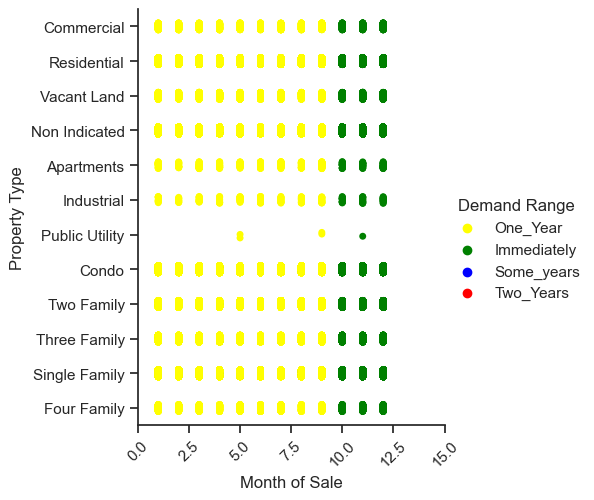

In [23]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Month of Sale", y="Property Type", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

In [24]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'PropertyType_Month of Sale_DemandRange.png'))

### - Residential Type 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

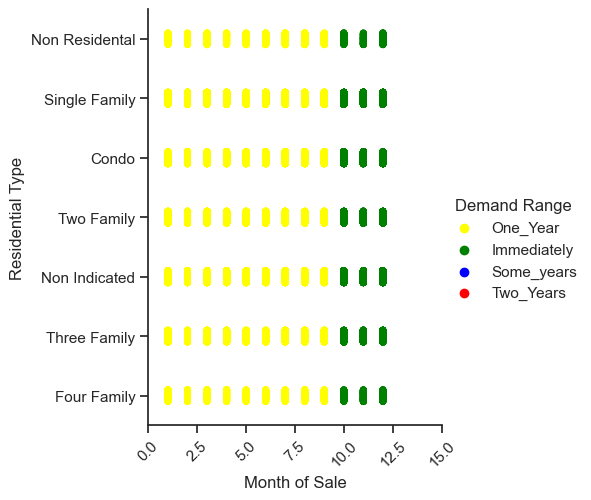

In [25]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Month of Sale", y="Residential Type", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

In [26]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'ResidentialType_Month of Sale_DemandRange.png'))

### - Year of Sale 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

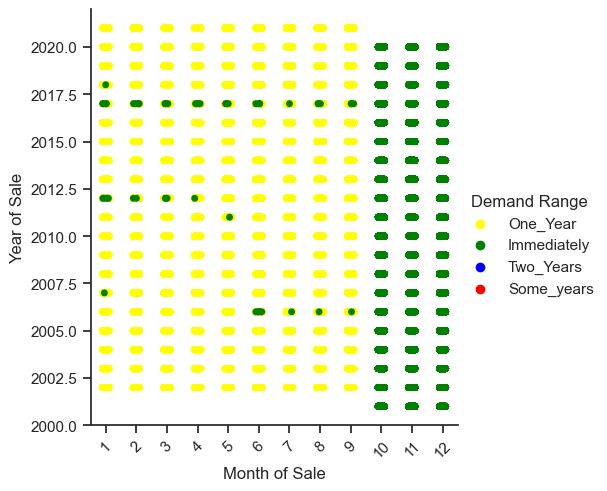

In [27]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Month of Sale", y="Year of Sale", hue="Demand Range", data=df_sold, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

In [28]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'YearOfSale_Month of Sale_DemandRange.png'))

In [33]:
### Findings:
### 1. Due to the lack of information regarding the month of listing, it is not possible to accurately determine the duration of the sale. The average duration of 90 days for Connecticut, as per Realtor.com data, is considered unreliable when analyzing the plot of '-Year of Sale'. Yellow data points represent listings from the previous year, indicating that a duration of 4th-9th months exceeds 3 months for deal closure. 
### Conversely, most deals closed within 10th-12th months were listed in the same year. Therefore, it can be inferred that the sale closure required less than 12 months. Consequently, the estimated sale closure duration ranges from 10 to 12 months.
### 2. The observed trend is consistent across all property and residential types.
### 3. Instances of swift sale closures are notable in the third quarter of 2006, the first quarter of 2012, and throughout 2017.   
### Realtor.com citation from : https://listwithclever.com/real-estate-blog/average-time-to-sell-a-house-in-connecticut/

### 04-3 Analyzing long closure sales outliers

In [11]:
# Crating  sub df to see the Real Estate sold in two or some years only 
df_sold1=df_sold[df_sold['Demand Range'].isin(['Some_years', 'Two_Years'])] 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

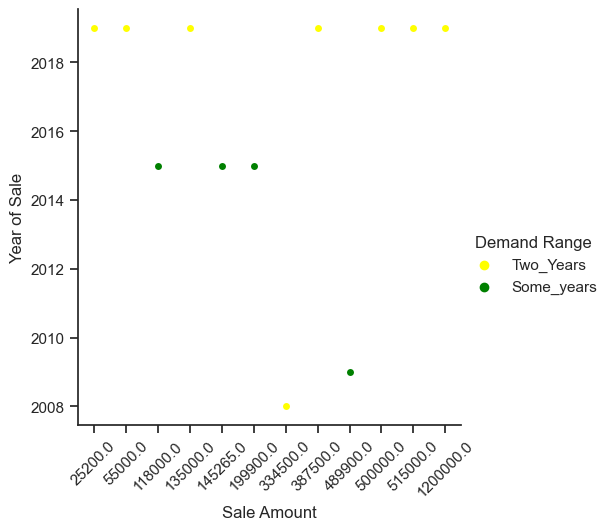

In [13]:
# Create a categorical plot in seaborn using the demand categories created above

sns.set(style="ticks")
g = sns.catplot(x="Sale Amount", y="Year of Sale", hue="Demand Range", data=df_sold1, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

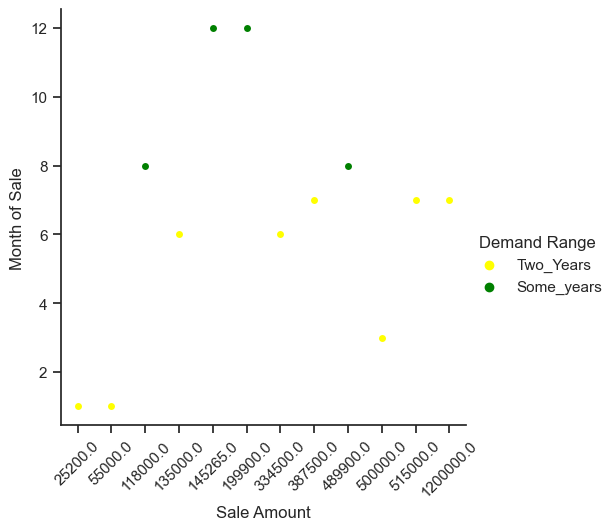

In [34]:
sns.set(style="ticks")
g = sns.catplot(x="Sale Amount", y="Month of Sale", hue="Demand Range", data=df_sold1, palette=['yellow', 'green', 'blue', 'red'])
g.set_xticklabels(rotation=45)

### 04-4  Analyzing the properties that have been sold but do not specify the sold amount  

In [16]:
df_re

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental,2021,9
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,10
2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,3
3,200243,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,2021,4
4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,2021,7
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020,6
997209,190284,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019,11
997210,190129,2019,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020,4
997211,190504,2019,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020,6


In [17]:
df_sold

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale,Sale_Amount_Zscore,Demand Range
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Non Residental,2021,9,-0.040765,One_Year
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,10,0.033112,Immediately
2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,3,-0.142855,One_Year
3,200243,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,2021,4,0.356761,One_Year
4,200377,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,2021,7,0.749010,One_Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020,6,-0.232070,One_Year
997209,190284,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019,11,-0.215958,Immediately
997210,190129,2019,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020,4,-0.121677,One_Year
997211,190504,2019,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020,6,-0.072426,One_Year


In [14]:
# creaiting sub df of properties sold without price indication
df_nsold=df_re[df_re['Sale Amount']==0]

In [15]:
df_nsold

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
86,10045,2001,Bethany,9 SIMPSON CT,96590.0,0.0,0.0,Non Indicated,Non Indicated,2002,1
139,10041,2001,Stratford,86 MINOR CROSS,107090.0,0.0,0.0,Non Indicated,Non Indicated,2001,10
150,10482,2001,Stratford,129 BAYBERRY LN,140390.0,0.0,0.0,Non Indicated,Non Indicated,2002,1
159,10466,2001,Stratford,1086 ESSEX PL,150640.0,0.0,0.0,Non Indicated,Non Indicated,2002,1
185,10124,2001,Stratford,1093 BARNUM AVE,200980.0,0.0,0.0,Non Indicated,Non Indicated,2001,10
...,...,...,...,...,...,...,...,...,...,...,...
900812,170108,2017,Oxford,63 ONEILL RD,184600.0,0.0,0.0,Single Family,Single Family,2018,4
902489,180046,2018,Berlin,63 STONY MILL LANE,137600.0,0.0,0.0,Condo,Condo,2018,10
914892,180006,2018,Winchester,53 CENTER ST,79100.0,0.0,0.0,Two Family,Two Family,2018,10
921479,180032,2018,Winchester,131 BELVIDERE,75950.0,0.0,0.0,Single Family,Single Family,2018,10


In [18]:
df_nsold.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Year of Sale,Month of Sale
count,1.783000e+03,1783.000000,1.783000e+03,1783.0,1783.0,1783.000000,1783.000000
mean,2.272399e+05,2003.674706,2.052367e+05,0.0,0.0,2004.309591,7.161526
std,5.724450e+06,3.653583,8.181097e+05,0.0,0.0,3.646186,3.604733
min,1.000100e+04,2001.000000,0.000000e+00,0.0,0.0,2001.000000,1.000000
25%,1.112400e+04,2001.000000,4.496500e+04,0.0,0.0,2002.000000,4.000000
50%,3.050900e+04,2003.000000,9.740000e+04,0.0,0.0,2004.000000,8.000000
75%,4.123150e+04,2004.000000,1.686200e+05,0.0,0.0,2005.000000,10.000000
max,1.710012e+08,2018.000000,2.205028e+07,0.0,0.0,2018.000000,12.000000


In [19]:
df_nsold['List Year'].value_counts(dropna = False)

List Year
2004    550
2001    504
2002    250
2003    183
2005    164
2017     58
2018     35
2012     21
2006     15
2007      3
Name: count, dtype: int64

In [20]:
df_nsold['Assessed Value'].value_counts(dropna = False)

Assessed Value
0.0          260
216790.0      10
4672150.0      5
128820.0       4
776600.0       4
            ... 
125850.0       1
635320.0       1
838250.0       1
92680.0        1
164010.0       1
Name: count, Length: 1351, dtype: int64

Text(0.5, 1.0, 'Assessed Value Distribution\non indicated Sales Value')

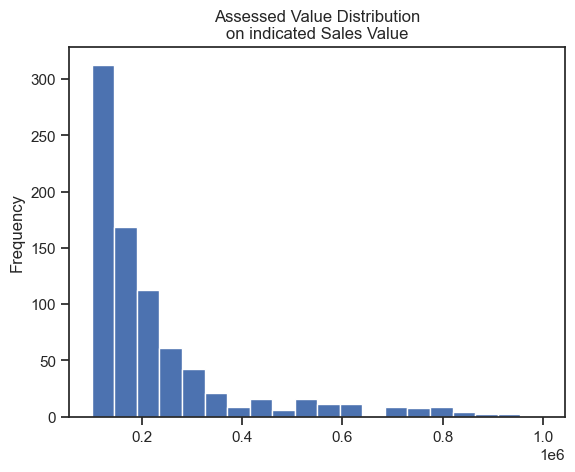

In [29]:
### Creating histogram for assessed Value
hist=df_nsold['Assessed Value'].plot.hist(bins=20, range=(100000,1000000))
hist.set_title('Assessed Value Distribution\non indicated Sales Value')

In [22]:
df_nsold['Year of Sale'].value_counts(dropna = False)

Year of Sale
2005    453
2002    345
2004    320
2001    229
2003    215
2006     89
2018     78
2007     18
2012     17
2017     15
2013      4
Name: count, dtype: int64

In [21]:
df_nsold['Month of Sale'].value_counts(dropna = False)

Month of Sale
10    241
11    208
12    202
1     160
6     151
8     136
7     129
2     128
9     123
5     110
3     103
4      92
Name: count, dtype: int64

In [23]:
df_nsold['Town'].value_counts(dropna = False)

Town
Stratford     304
Hartford      184
Bethany       154
Westport       94
Easton         52
             ... 
Plainfield      1
East Lyme       1
Enfield         1
Granby          1
Rocky Hill      1
Name: count, Length: 138, dtype: int64

#### Conclusions: The properties with not indicated Sales Amount have random characteristics and theeir quantity is 0.17% from total quantity of Real Estate. Therefore it can be considerated data recording error.